In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
FIGSIZE = (10, 5)
WEEKDAYS = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']

### Download data

In [5]:
# # Create directory
# !mkdir ./data/seatle_bicycle_counts/

# # Curl command to download data
# !curl -o \
# ./data/seatle_bicycle_counts/FremontBridge.csv \
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=Download

In [6]:
fp = './data/seatle_bicycle_counts/FremontBridge.csv'
df = pd.read_csv(fp, index_col='Date', parse_dates=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62760 entries, 2012-10-03 00:00:00 to 2019-11-30 23:00:00
Data columns (total 3 columns):
Fremont Bridge Total            62750 non-null float64
Fremont Bridge East Sidewalk    62750 non-null float64
Fremont Bridge West Sidewalk    62750 non-null float64
dtypes: float64(3)
memory usage: 1.9 MB


In [8]:
df.columns = ['total', 'east', 'west']

In [9]:
df.head()

,total,east,west
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [10]:
df.dropna().describe()

,total,east,west
count,62750.000000,62750.000000,62750.000000
mean,114.693163,52.726948,61.966215
std,145.818044,67.595710,90.692425
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,75.000000
max,1097.000000,698.000000,850.000000


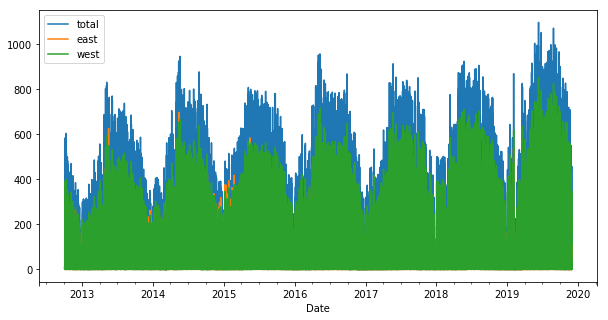

In [11]:
df.plot(figsize=FIGSIZE);

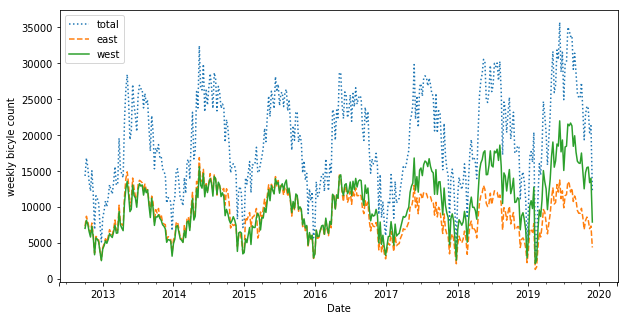

In [12]:
weekly = df.resample('W').sum()
weekly.plot(style=[':', '--', '-'], figsize=FIGSIZE)
plt.ylabel('weekly bicyle count');

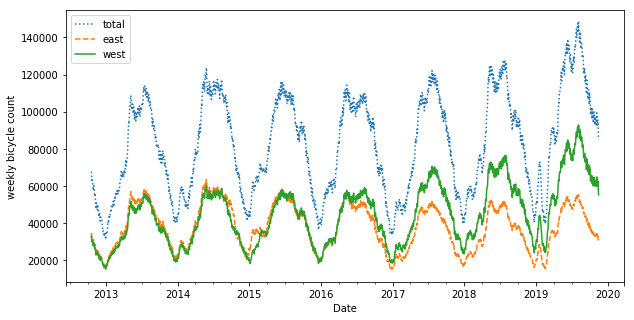

In [13]:
daily = df.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'], figsize=FIGSIZE)
plt.ylabel('weekly bicycle count');

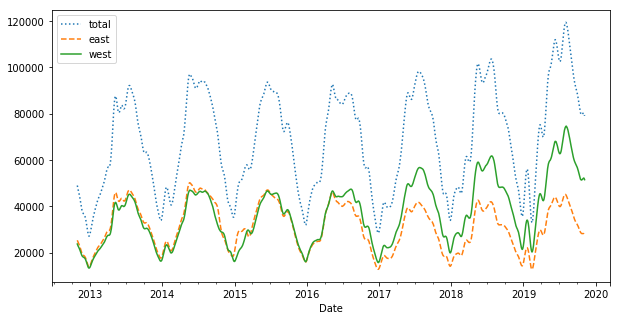

In [14]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'], figsize=FIGSIZE);

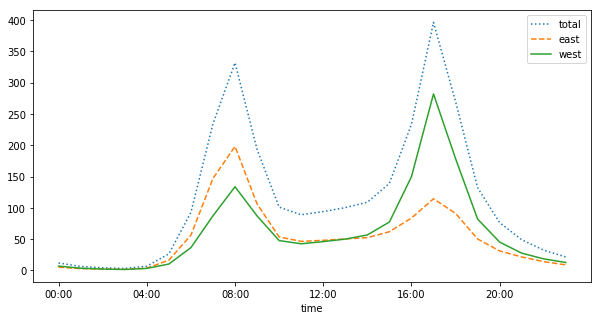

In [15]:
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4*60*60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=FIGSIZE);

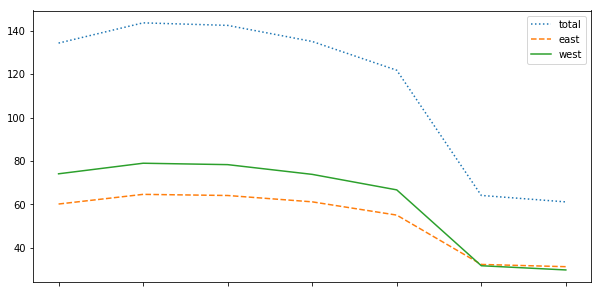

In [16]:
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = WEEKDAYS
by_weekday.plot(figsize=FIGSIZE, style=[':', '--', '-']);

In [22]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df.groupby([weekend, df.index.time]).mean()

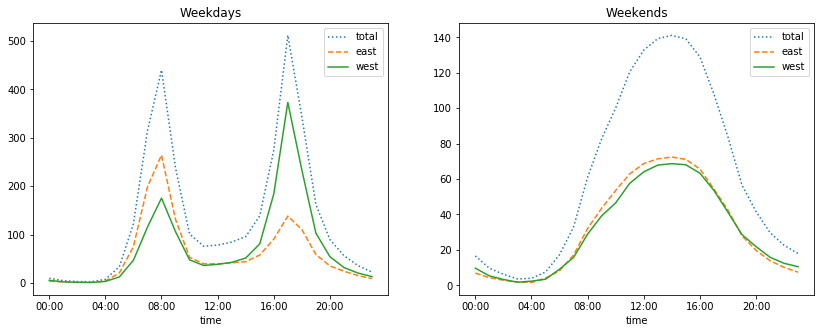

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

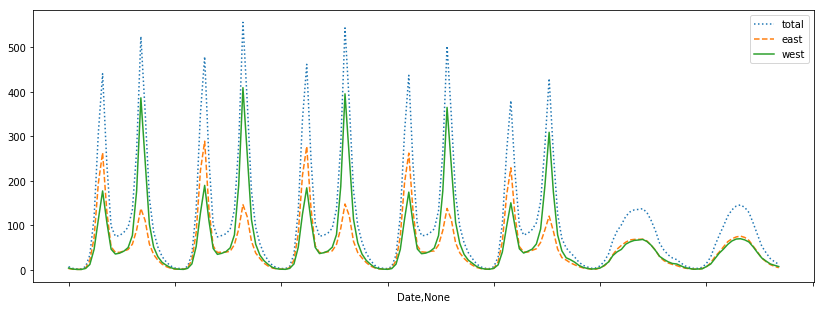

In [76]:
df.groupby([df.index.dayofweek, df.index.time]).mean().plot(style=[':', '--', '-'], figsize=(14, 5));